In [1]:
from river.datasets.synth import FriedmanDrift
from river.preprocessing import MinMaxScaler
from river.metrics import MAE
from river.utils import Rolling
from river.tree import HoeffdingTreeRegressor
from deep_river.regression import RegressorInitialized
from torch import nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

In [2]:
n_samples = 12500
change_points = (5000, 7500)
friedman = FriedmanDrift(drift_type="gra", position=change_points)


def test_train_eval(model, stream, update_interval=100):
    results = []
    steps = []
    step = 0
    metric = Rolling(MAE(), window_size=400)
    scaler = MinMaxScaler()
    for x, y in tqdm(list(stream)):
        scaler.learn_one(x)
        x = scaler.transform_one(x)
        y_pred = model.predict_one(x)
        model.learn_one(x, y)
        metric.update(y, y_pred)
        step += 1
        if step % update_interval == 0:
            results.append(metric.get())
            steps.append(step)
    return steps, results

In [3]:
class SimpleMLP(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.hidden = nn.Linear(n_features, 20)
        self.logit = nn.Linear(20, 1)

    def forward(self, x):
        h = self.hidden(x)
        h = torch.relu(h)
        return self.logit(h)


mlp = RegressorInitialized(
    SimpleMLP(10),
    loss_fn="l1",
    optimizer_fn="adam",
    lr=0.005,
    seed=42,
)
steps, results_mlp = test_train_eval(mlp, friedman.take(n_samples))

  0%|                                                                                                                                                                                                                                                                                    | 0/12500 [00:00<?, ?it/s]

  0%|▉                                                                                                                                                                                                                                                                         | 45/12500 [00:00<00:27, 447.53it/s]

  1%|███▉                                                                                                                                                                                                                                                                    | 186/12500 [00:00<00:12, 1007.84it/s]

  3%|██████▉                                                                                                                                                                                                                                                                 | 327/12500 [00:00<00:10, 1188.93it/s]

  4%|█████████▌                                                                                                                                                                                                                                                              | 454/12500 [00:00<00:09, 1218.92it/s]

  5%|████████████▌                                                                                                                                                                                                                                                           | 597/12500 [00:00<00:09, 1293.06it/s]

  6%|███████████████▊                                                                                                                                                                                                                                                        | 747/12500 [00:00<00:08, 1361.26it/s]

  7%|██████████████████▉                                                                                                                                                                                                                                                     | 897/12500 [00:00<00:08, 1405.44it/s]

  8%|█████████████████████▊                                                                                                                                                                                                                                                 | 1038/12500 [00:00<00:08, 1380.33it/s]

  9%|████████████████████████▊                                                                                                                                                                                                                                              | 1182/12500 [00:00<00:08, 1396.69it/s]

 11%|████████████████████████████                                                                                                                                                                                                                                           | 1335/12500 [00:01<00:07, 1434.90it/s]

 12%|███████████████████████████████                                                                                                                                                                                                                                        | 1479/12500 [00:01<00:07, 1400.29it/s]

 13%|██████████████████████████████████▎                                                                                                                                                                                                                                    | 1630/12500 [00:01<00:07, 1432.02it/s]

 14%|█████████████████████████████████████▎                                                                                                                                                                                                                                 | 1774/12500 [00:01<00:07, 1405.45it/s]

 15%|████████████████████████████████████████▍                                                                                                                                                                                                                              | 1921/12500 [00:01<00:07, 1423.71it/s]

 17%|███████████████████████████████████████████▍                                                                                                                                                                                                                           | 2067/12500 [00:01<00:07, 1432.69it/s]

 18%|██████████████████████████████████████████████▌                                                                                                                                                                                                                        | 2211/12500 [00:01<00:07, 1402.33it/s]

 19%|█████████████████████████████████████████████████▍                                                                                                                                                                                                                     | 2352/12500 [00:01<00:07, 1379.54it/s]

 20%|████████████████████████████████████████████████████▍                                                                                                                                                                                                                  | 2491/12500 [00:01<00:07, 1360.84it/s]

 21%|███████████████████████████████████████████████████████▎                                                                                                                                                                                                               | 2629/12500 [00:01<00:07, 1365.11it/s]

 22%|██████████████████████████████████████████████████████████▎                                                                                                                                                                                                            | 2770/12500 [00:02<00:07, 1377.67it/s]

 23%|█████████████████████████████████████████████████████████████▎                                                                                                                                                                                                         | 2916/12500 [00:02<00:06, 1399.93it/s]

 25%|████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                      | 3070/12500 [00:02<00:06, 1440.24it/s]

 26%|███████████████████████████████████████████████████████████████████▋                                                                                                                                                                                                   | 3215/12500 [00:02<00:06, 1410.98it/s]

 27%|██████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                                | 3357/12500 [00:02<00:06, 1399.83it/s]

 28%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                             | 3502/12500 [00:02<00:06, 1414.36it/s]

 29%|████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                          | 3646/12500 [00:02<00:06, 1421.70it/s]

 30%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                       | 3795/12500 [00:02<00:06, 1440.22it/s]

 32%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                    | 3940/12500 [00:02<00:06, 1395.22it/s]

 33%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                 | 4085/12500 [00:02<00:05, 1410.43it/s]

 34%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                              | 4227/12500 [00:03<00:05, 1395.73it/s]

 35%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                           | 4367/12500 [00:03<00:05, 1365.21it/s]

 36%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                        | 4504/12500 [00:03<00:05, 1333.80it/s]

 37%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                     | 4638/12500 [00:03<00:06, 1302.06it/s]

 38%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                  | 4769/12500 [00:03<00:06, 1267.37it/s]

 39%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                | 4896/12500 [00:03<00:06, 1253.33it/s]

 40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                             | 5022/12500 [00:03<00:05, 1255.17it/s]

 41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                          | 5148/12500 [00:03<00:05, 1243.78it/s]

 42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                        | 5276/12500 [00:03<00:05, 1252.62it/s]

 43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                     | 5409/12500 [00:04<00:05, 1272.03it/s]

 44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                  | 5552/12500 [00:04<00:05, 1317.92it/s]

 45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                               | 5684/12500 [00:04<00:05, 1309.51it/s]

 47%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                            | 5816/12500 [00:04<00:05, 1274.57it/s]

 48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                          | 5944/12500 [00:04<00:06, 965.28it/s]

 49%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                       | 6072/12500 [00:04<00:06, 1040.22it/s]

 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                    | 6197/12500 [00:04<00:05, 1092.71it/s]

 51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                 | 6333/12500 [00:04<00:05, 1163.03it/s]

 52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                               | 6456/12500 [00:04<00:05, 1172.77it/s]

 53%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                             | 6578/12500 [00:05<00:07, 809.19it/s]

 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                           | 6677/12500 [00:05<00:07, 742.87it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                         | 6765/12500 [00:05<00:07, 759.22it/s]

 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                       | 6868/12500 [00:05<00:06, 820.37it/s]

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                    | 6971/12500 [00:05<00:06, 869.89it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                  | 7065/12500 [00:05<00:06, 803.95it/s]

 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                 | 7151/12500 [00:05<00:06, 812.27it/s]

 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                               | 7237/12500 [00:06<00:07, 706.86it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                             | 7313/12500 [00:06<00:07, 701.44it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                            | 7391/12500 [00:06<00:07, 718.32it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 7482/12500 [00:06<00:06, 767.93it/s]

 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                       | 7595/12500 [00:06<00:05, 865.18it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                     | 7698/12500 [00:06<00:05, 909.22it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 7791/12500 [00:06<00:05, 901.60it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                 | 7883/12500 [00:06<00:05, 887.56it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                               | 8007/12500 [00:06<00:04, 986.81it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 8135/12500 [00:07<00:04, 1069.43it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 8243/12500 [00:07<00:04, 987.25it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 8344/12500 [00:07<00:04, 856.63it/s]

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 8449/12500 [00:07<00:04, 905.75it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 8544/12500 [00:07<00:04, 916.79it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 8659/12500 [00:07<00:03, 980.69it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 8788/12500 [00:07<00:03, 1067.41it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 8920/12500 [00:07<00:03, 1138.88it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 9036/12500 [00:07<00:03, 1112.01it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 9149/12500 [00:08<00:03, 1036.29it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 9266/12500 [00:08<00:03, 1071.96it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 9388/12500 [00:08<00:02, 1113.22it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 9501/12500 [00:08<00:03, 955.88it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 9627/12500 [00:08<00:02, 1034.63it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 9759/12500 [00:08<00:02, 1110.49it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 9895/12500 [00:08<00:02, 1177.31it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 10020/12500 [00:08<00:02, 1195.29it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 10142/12500 [00:08<00:02, 1143.88it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 10259/12500 [00:09<00:02, 964.64it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 10362/12500 [00:09<00:03, 670.15it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 10445/12500 [00:09<00:03, 659.32it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 10550/12500 [00:09<00:02, 740.74it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 10657/12500 [00:09<00:02, 814.93it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 10781/12500 [00:09<00:01, 918.35it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 10898/12500 [00:09<00:01, 978.38it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 11004/12500 [00:10<00:01, 998.50it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 11131/12500 [00:10<00:01, 1073.43it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 11257/12500 [00:10<00:01, 1124.79it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 11385/12500 [00:10<00:00, 1168.37it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 11508/12500 [00:10<00:00, 1185.34it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 11629/12500 [00:10<00:00, 933.71it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 11734/12500 [00:10<00:00, 962.23it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 11864/12500 [00:10<00:00, 1049.07it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 11989/12500 [00:10<00:00, 1102.09it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 12105/12500 [00:11<00:00, 1016.93it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 12212/12500 [00:11<00:00, 1002.41it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 12332/12500 [00:11<00:00, 1054.77it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 12459/12500 [00:11<00:00, 1113.29it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:11<00:00, 1097.06it/s]

In [4]:
tree = HoeffdingTreeRegressor()
steps, results_tree = test_train_eval(tree, friedman.take(n_samples))

  0%|                                                                                                                                                                                                                                                                                    | 0/12500 [00:00<?, ?it/s]

  6%|██████████████▉                                                                                                                                                                                                                                                         | 710/12500 [00:00<00:01, 7097.16it/s]

 12%|████████████████████████████████▎                                                                                                                                                                                                                                      | 1537/12500 [00:00<00:01, 7785.86it/s]

 19%|█████████████████████████████████████████████████▋                                                                                                                                                                                                                     | 2361/12500 [00:00<00:01, 7992.98it/s]

 26%|████████████████████████████████████████████████████████████████████                                                                                                                                                                                                   | 3234/12500 [00:00<00:01, 8283.62it/s]

 33%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                 | 4080/12500 [00:00<00:01, 8345.62it/s]

 40%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                              | 4963/12500 [00:00<00:00, 8507.79it/s]

 47%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                            | 5814/12500 [00:00<00:00, 8412.80it/s]

 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                      | 6862/12500 [00:00<00:00, 8900.27it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 7751/12500 [00:00<00:00, 8599.07it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 8612/12500 [00:01<00:00, 8476.33it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 9464/12500 [00:01<00:00, 8489.10it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 10415/12500 [00:01<00:00, 8790.06it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 11403/12500 [00:01<00:00, 9114.04it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 12316/12500 [00:01<00:00, 8227.27it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:01<00:00, 8450.00it/s]

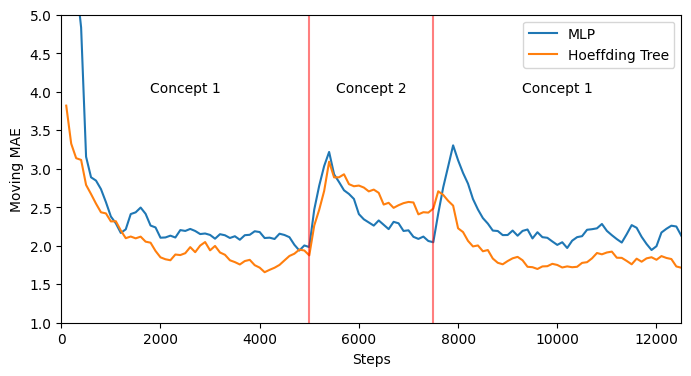

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(steps, results_mlp, label="MLP")
ax.plot(steps, results_tree, label="Hoeffding Tree")
for change_point in change_points:
    ax.axvline(change_point, color="red", alpha=0.5)
ax.set_xlim(0, n_samples)
ax.set_ylim(1, 5)
plt.text(
    int(change_points[0] / 2), 4, "Concept 1", horizontalalignment="center"
)
plt.text(
    int(change_points[0] + (change_points[1] - change_points[0]) / 2),
    4,
    "Concept 2",
    horizontalalignment="center",
)
plt.text(
    int(change_points[1] + (n_samples - change_points[1]) / 2),
    4,
    "Concept 1",
    horizontalalignment="center",
)

ax.set_xlabel("Steps")
ax.set_ylabel("Moving MAE")
ax.legend()